In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.utils import np_utils

In [3]:
class Config:
  pass
config = Config()

In [4]:
config.optimizer = "adam"
config.epochs = 10
config.hidden_nodes = 100

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
config.dropout = 0.1

In [21]:
# create model
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dropout(config.dropout))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dropout(config.dropout))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
                    metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_6 (Dropout)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3201 - accuracy: 0.9069 - val_loss: 0.1475 - val_accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1561 - accuracy: 0.9532 - val_loss: 0.1101 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1197 - accuracy: 0.9645 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0973 - accuracy: 0.9702 - val_loss: 0.0858 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0831 - accuracy: 0.9736 - val_loss: 0.0756 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9757 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.0734 - val_accuracy

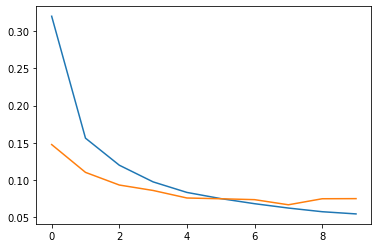

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

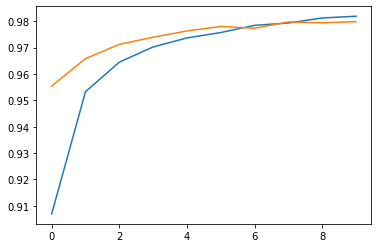

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])